### Load and Explore Data:

In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("rtl_power_data.csv")
print(df.head())


   num_gates  freq_MHz  area_mm2  pipeline_stages  power_mW
0       2000       200       1.2                5       0.8
1       3500       300       1.8                7       1.2
2       4000       250       2.0                6       1.3
3       5000       400       3.0                8       1.9
4       4500       350       2.5                7       1.5


In [7]:
print(df.describe())

          num_gates     freq_MHz   area_mm2  pipeline_stages   power_mW
count     19.000000    19.000000  19.000000        19.000000  19.000000
mean    7868.421053   602.105263   4.794737        11.052632   3.247368
std     4609.296479   330.127567   3.112961         5.359039   2.222953
min     1000.000000   150.000000   0.900000         3.000000   0.500000
25%     4250.000000   325.000000   2.250000         7.000000   1.400000
50%     7000.000000   550.000000   4.000000        10.000000   2.800000
75%    11500.000000   875.000000   7.000000        14.500000   4.750000
max    16000.000000  1200.000000  11.000000        22.000000   8.000000


### Visualize the data:

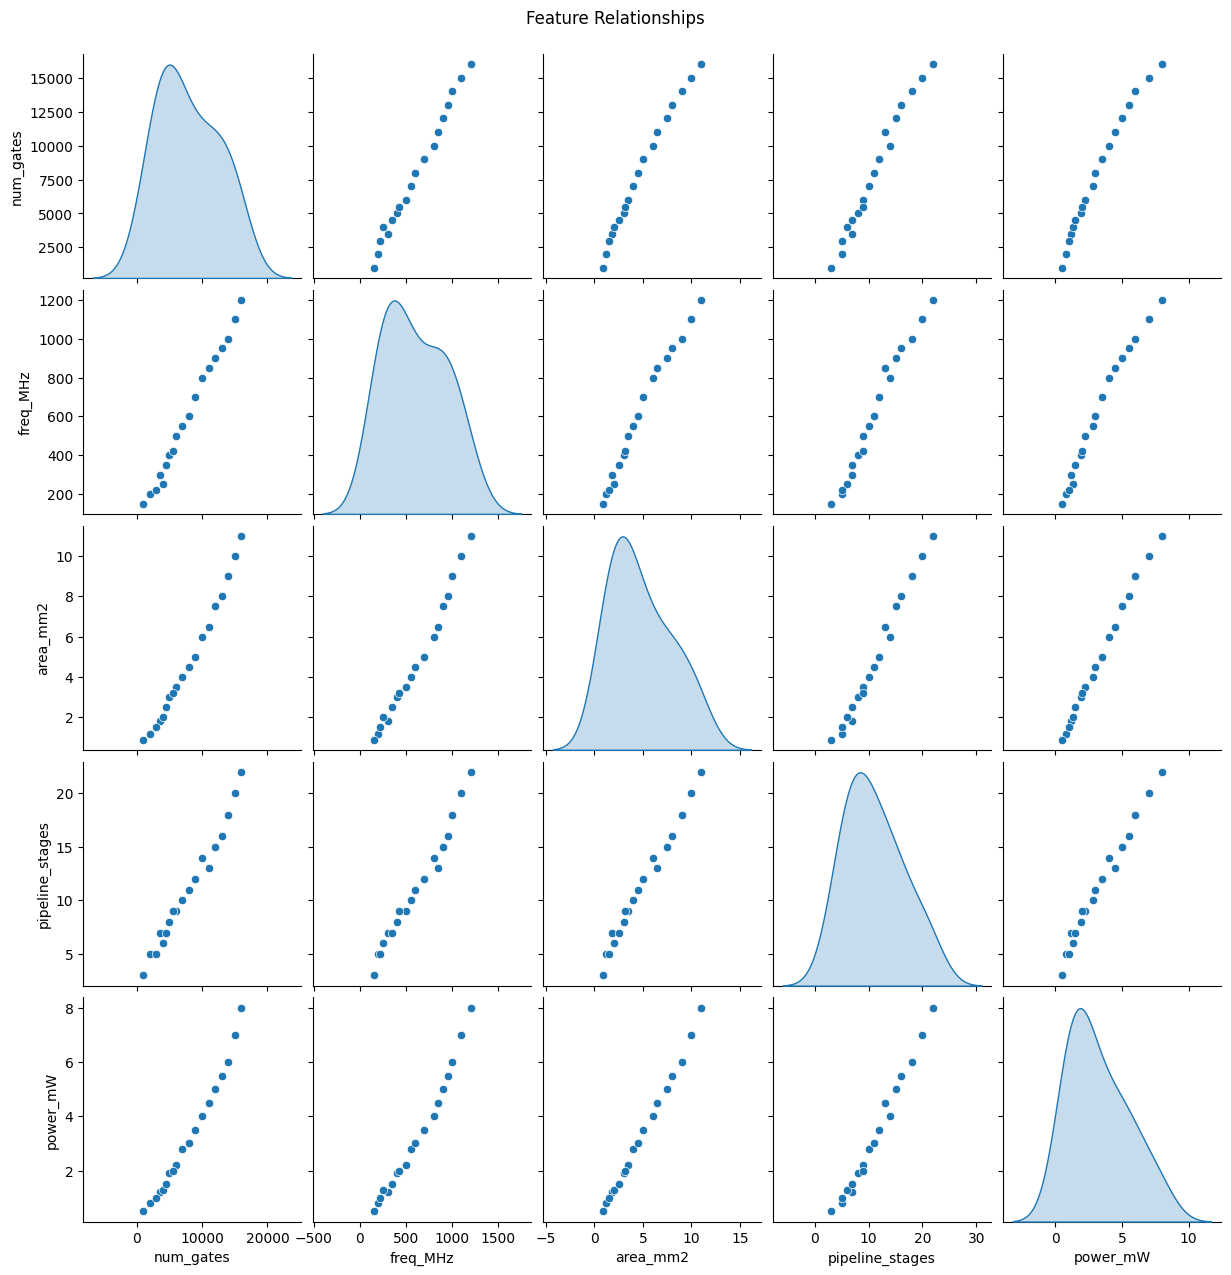

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, diag_kind='kde')
plt.suptitle("Feature Relationships", y=1.02)
plt.show()


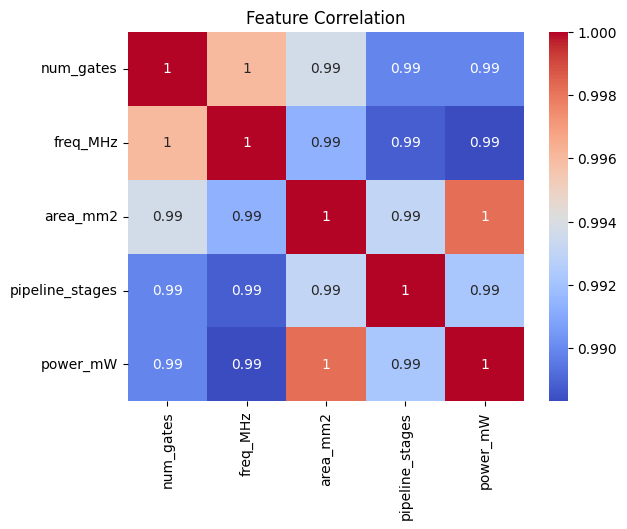

In [9]:
# Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

### Prepare Dataset For Machine Learning Model:

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("power_mW", axis=1)
y = df["power_mW"]

In [12]:
print(X.head())

   num_gates  freq_MHz  area_mm2  pipeline_stages
0       2000       200       1.2                5
1       3500       300       1.8                7
2       4000       250       2.0                6
3       5000       400       3.0                8
4       4500       350       2.5                7


In [13]:
print(y.head())

0    0.8
1    1.2
2    1.3
3    1.9
4    1.5
Name: power_mW, dtype: float64


In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train ML Model (Random Forest)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
# Predict
y_pred = model.predict(X_test_scaled)

In [20]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0068
R² Score: 0.9937


### Feature Importance Analysis

In [23]:
import numpy as np

features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

### Bar Plot

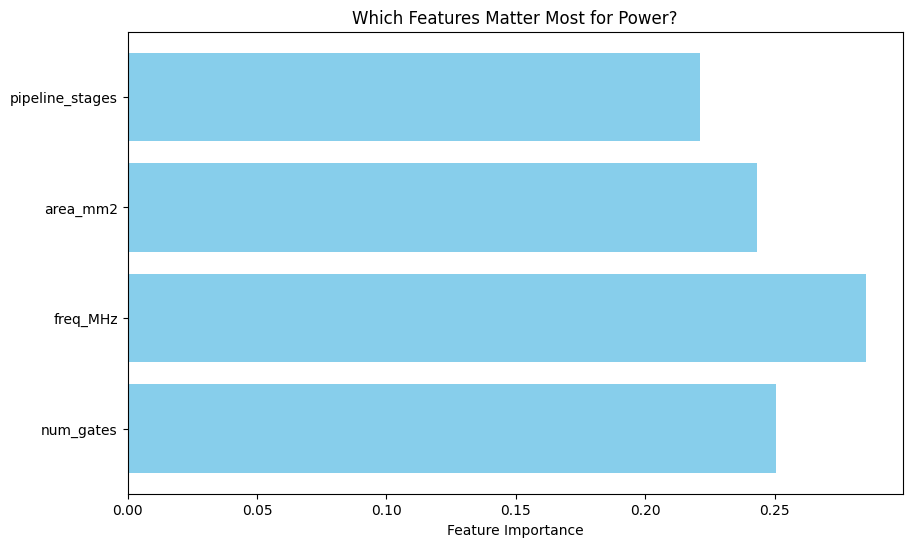

In [24]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Which Features Matter Most for Power?")
plt.show()